In [1]:
import pandas as pd
census_data = pd.read_csv('../shared_data_read_only/Census-Data/ACSST5Y2022.S2201-Data.csv', index_col=False)




/tmp/ipykernel_71567/1675165038.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,70,71,72,73,74,75,76,77,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,222,223,224,225,226,227,228,229,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,374,375,376,377,378,379,380,381) have mixed types. Specify dtype option on import or set low_memory=False.
  census_data = pd.read_csv('../shared_data_read_only/Cens

In [2]:
philly_df = census_data.loc[census_data['NAME'].str.contains("Philadelphia County")]

In [3]:
food_stamps = philly_df[["GEO_ID", "NAME", "S2201_C04_001E"]]

food_stamps = food_stamps[food_stamps["S2201_C04_001E"] != '-']
food_stamps["S2201_C04_001E"] = food_stamps["S2201_C04_001E"].astype(float)

food_sorted = food_stamps.sort_values(by=["S2201_C04_001E"], ascending=False)
food_sorted.head(20)

,GEO_ID,NAME,S2201_C04_001E
66156,1400000US42101017500,Census Tract 175; Philadelphia County; Pennsyl...,78.2
66159,1400000US42101017701,Census Tract 177.01; Philadelphia County; Penn...,74.3
66168,1400000US42101018802,Census Tract 188.02; Philadelphia County; Penn...,74.0
66158,1400000US42101017602,Census Tract 176.02; Philadelphia County; Penn...,73.8
66167,1400000US42101018801,Census Tract 188.01; Philadelphia County; Penn...,72.6
66142,1400000US42101016400,Census Tract 164; Philadelphia County; Pennsyl...,71.7
66173,1400000US42101019502,Census Tract 195.02; Philadelphia County; Penn...,68.4
66252,1400000US42101028500,Census Tract 285; Philadelphia County; Pennsyl...,68.0
66171,1400000US42101019200,Census Tract 192; Philadelphia County; Pennsyl...,67.7
66172,1400000US42101019501,Census Tract 195.01; Philadelphia County; Penn...,66.5


In [4]:
food_geo_id = food_sorted['GEO_ID'].to_numpy()[0:20]

In [5]:
belowPov = philly_df[["GEO_ID","NAME","S2201_C02_021E"]]
belowPov = belowPov[belowPov["S2201_C02_021E"] != '-']
belowPov["S2201_C02_021E"] = belowPov["S2201_C02_021E"].astype(float)
belowPov_sorted = belowPov.sort_values(by = ["S2201_C02_021E"], ascending=False)

belowPov_sorted.head(20)
belowPov_GeoID = belowPov_sorted['GEO_ID'].to_numpy()[0:20]

In [6]:
med_inc = philly_df[["GEO_ID", "NAME", "S2201_C01_034E"]]

med_inc = med_inc[med_inc["S2201_C01_034E"] != '-']
med_inc["S2201_C01_034E"] = med_inc["S2201_C01_034E"].astype(float)

med_inc_sorted = med_inc.sort_values(by=["S2201_C01_034E"], ascending=True)
inc_sorted = med_inc_sorted.head(20)

inc_GEO_ID = inc_sorted["GEO_ID"].to_numpy()

In [7]:
res_array = []
for i in range(20):
    if (inc_GEO_ID[i] in belowPov_GeoID) and (inc_GEO_ID[i] in food_geo_id):
        res_array.append(inc_GEO_ID[i])

    

In [8]:
final_zips = philly_df[["GEO_ID", "NAME", "S2201_C01_001E", "S2201_C01_034E", "S2201_C02_009E", "S2201_C02_021E", "S2201_C02_026E", "S2201_C04_001E"]]
final_zips = final_zips.loc[final_zips["GEO_ID"].isin(res_array)]
final_zips.rename(columns={'S2201_C01_001E': 'Total Households', 'S2201_C01_034E': 'Median Income', 'S2201_C02_009E': 'With Children', 'S2201_C02_021E': 'Below Poverty', 'S2201_C02_026E': 'Black or African American', 'S2201_C04_001E': 'Food Stamps'}, inplace=True)


In [9]:
zip_data = pd.read_csv('../shared_data_read_only/Geography-Mapping/ZIP_TRACT_122023.csv')



In [10]:
final_zip_codes = set()
for data in res_array:
    data = data[9:]
    zip_final = zip_data.query(f"TRACT == {data}")["ZIP"].values
    for zipcode in zip_final:
        if zipcode != 19140:
            final_zip_codes.add(zipcode)

In [11]:
final_zip_codes

{19121, 19124, 19132, 19133, 19134}

In [12]:
final_zips.insert(0, 'Zip Code', list(final_zip_codes))

In [17]:
final_zips
final_zips = final_zips.drop(columns=["NAME"])
final_zips = final_zips.drop(columns=['GEO_ID'])

In [19]:
new_final_zips=final_zips.to_string(index=False)


In [27]:
print(new_final_zips)


 Zip Code Total Households Median Income With Children Below Poverty Black or African American Food Stamps
    19121             1698         20915          41.8          51.7                      36.9        71.7
    19124             1517         15267          26.4          51.0                      90.4        61.2
    19132             1107         20010          42.3          67.4                       5.0        72.6
    19133             1877         23031          42.9          54.9                       5.3        66.5
    19134             1343         22649          43.4          52.5                      44.8        60.4
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 66142 to 66262
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Zip Code                   5 non-null      int64 
 1   Total Households           5 non-null      object
 2   Median Income              5 n

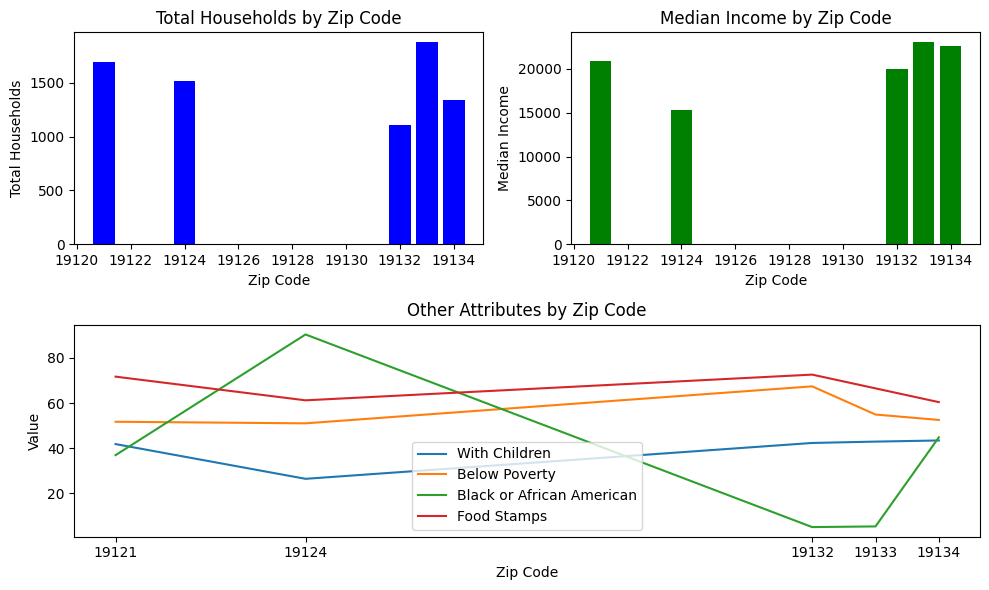

In [32]:
columns_to_convert = ['Total Households', 'Median Income', 'With Children', 
                      'Below Poverty', 'Black or African American', 'Food Stamps']
final_zips[columns_to_convert] = final_zips[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Plot the data after converting columns to numeric
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Total Households
plt.subplot(2, 2, 1)
plt.bar(final_zips['Zip Code'], final_zips['Total Households'], color='blue')
plt.xlabel('Zip Code')
plt.ylabel('Total Households')
plt.title('Total Households by Zip Code')

# Plot Median Income
plt.subplot(2, 2, 2)
plt.bar(final_zips['Zip Code'], final_zips['Median Income'], color='green')
plt.xlabel('Zip Code')
plt.ylabel('Median Income')
plt.title('Median Income by Zip Code')


plt.subplot(2, 1, 2)
for col in final_zips.columns[3:]:
    plt.plot(final_zips['Zip Code'], final_zips[col], label=col)

plt.xlabel('Zip Code')
plt.ylabel('Value')
plt.title('Other Attributes by Zip Code')
plt.legend()

# Set x-axis ticks to exact ZIP codes
plt.xticks(final_zips['Zip Code'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()